In [1]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass

In [4]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [5]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [6]:
# Network configuration

data = gray_colors
batch_size = 4

length = 2
width = 2
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [7]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    global dim
    dim = len(data[0])
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader

In [8]:
def map_view_for_coding(map_):
    return torch.transpose(map_, 0, 1).view(dim, length, width)
#     return map_.view(dim, length, width)

In [9]:
def map_display(map_):
#     return torch.transpose(map_, 0, 1).view(dim, length, width)
    if dim == 1:
        return map_.view(length, width)
    else:
        return map_.view(dim, length, width)

In [10]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [11]:
training = load_data(data)

In [12]:
map1 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
1 0
1 1


In [13]:
map1.weights_to_map()

tensor([[0.5683, 0.0594],
        [0.6760, 0.6540]])

tensor([0.1250])
tensor([1])


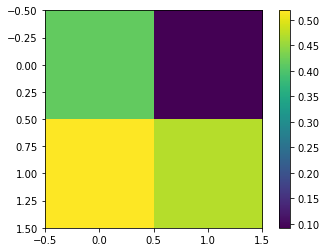

tensor([[0.4155, 0.0922],
        [0.5185, 0.4717]])


In [14]:
map1.step(training, verbose=True)

In [15]:
map1.step()

TypeError: step() missing 1 required positional argument: 'training_data'

In [ ]:
map1.weights

In [ ]:
train = []
for train_ in training:
    print(train_)
    train = train_

In [ ]:
row_data = train[0][2]
row_data

In [ ]:
map1.weights

In [ ]:
difference = row_data - map1.weights
difference

In [ ]:
bmu_index = 0

In [ ]:
map1.impact_matrix[bmu_index].view(4,1)

In [ ]:
change = map1.impact_matrix[bmu_index].view(4,1) * difference
change

In [ ]:
map1.weights = map1.weights + change

In [ ]:
map1.weights

In [ ]:
map1.impact_matrix[bmu_index]

In [ ]:
map1.distance_matrix

In [ ]:
torch.mm(map1.impact_matrix[bmu_index].view(4,1), change)

In [ ]:
map1.impact_matrix

In [ ]:
basic_visualization(map_display(map1.weights))

In [ ]:
map_display(map1.weights)

In [ ]:
map1.weights

In [ ]:
difference = row_data - map1.weights

In [ ]:
bmu_index = 0

In [ ]:
change = map1.impact_matrix[bmu_index].view(4,1) * difference

In [ ]:
map1.weights = map1.weights + change

In [ ]:
map1.weights

In [ ]:
difference = row_data - map1.weights
change = map1.impact_matrix[bmu_index].view(4,1) * difference
map1.weights = map1.weights + change